In [4]:
import cv2
import numpy as np

# Charger l'image
image = cv2.imread(r"C:\Users\emnad\Downloads\dataPI\bulletin_de_soin\bulletin_de_soin10.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Détection des contours
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# Trouver l'angle moyen des lignes détectées
angles = []
for rho, theta in lines[:, 0]:
    angle = (theta * 180 / np.pi) - 90  # Convertir en degrés
    angles.append(angle)

# Calcul de l'angle moyen et correction
angle_median = np.median(angles)
(h, w) = gray.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle_median, 1.0)
rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

cv2.imwrite("document_redresse.jpg", rotated)


True

In [5]:
gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite("document_binarise.jpg", binary)


True

In [6]:
filtered = cv2.bilateralFilter(binary, 9, 75, 75)
cv2.imwrite("document_filtre.jpg", filtered)


True

In [7]:
kernel = np.ones((2, 2), np.uint8)
cleaned = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel, iterations=1)
cv2.imwrite("document_sans_bruit.jpg", cleaned)


True

In [8]:
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if w > 20 and h > 10:  # Filtrer les petits bruits
        cv2.rectangle(rotated, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imwrite("document_segmente.jpg", rotated)


True

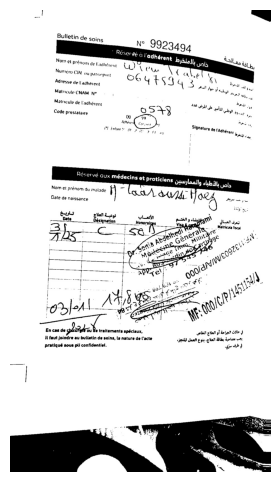

In [9]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image traitée
image = cv2.imread("document_sans_bruit.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir en RGB pour Matplotlib

# Afficher l'image
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis("off")  # Cacher les axes
plt.show()


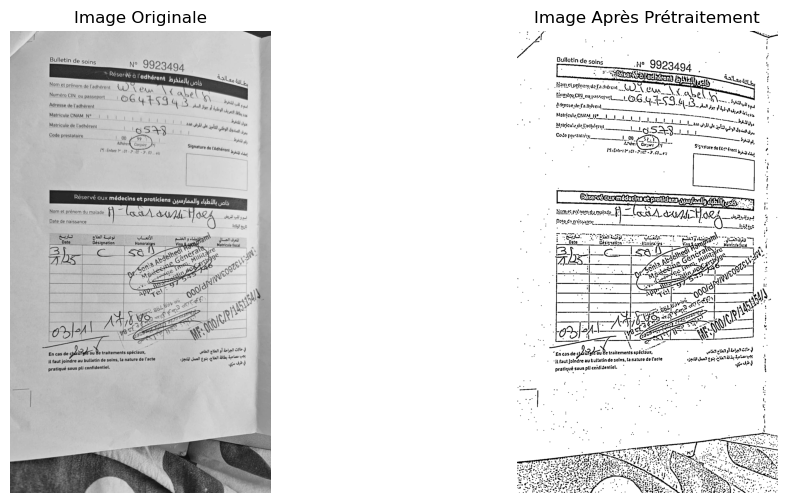

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveaux de gris
image = cv2.imread(r"C:\Users\emnad\Downloads\dataPI\bulletin_de_soin\bulletin_de_soin10.jpeg", cv2.IMREAD_GRAYSCALE)

# 1️⃣ Appliquer un flou pour réduire le bruit
image_blur = cv2.GaussianBlur(image, (5, 5), 0)

# 2️⃣ Binarisation (seuil adaptatif pour garder le texte manuscrit)
image_bin = cv2.adaptiveThreshold(image_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY, 11, 2)

# 3️⃣ Filtrage pour éliminer les tampons (fermeture morphologique)
kernel = np.ones((3,3), np.uint8)
image_filtered = cv2.morphologyEx(image_bin, cv2.MORPH_CLOSE, kernel, iterations=1)

# Afficher l'image originale et traitée
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image, cmap="gray")
ax[0].set_title("Image Originale")
ax[0].axis("off")

ax[1].imshow(image_filtered, cmap="gray")
ax[1].set_title("Image Après Prétraitement")
ax[1].axis("off")

plt.show()


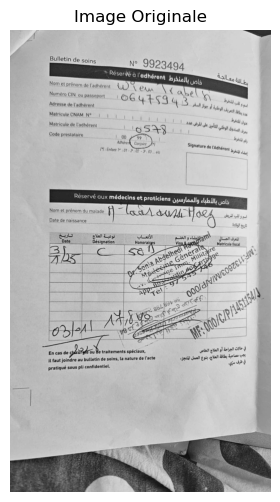

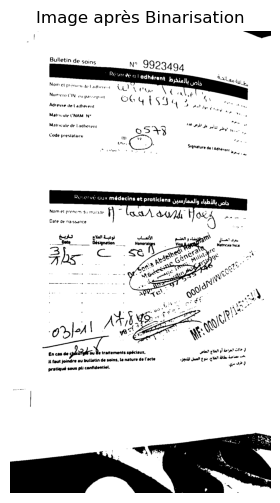

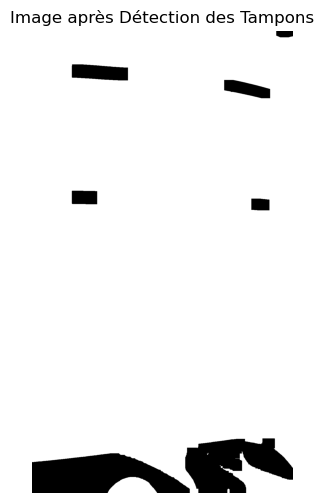

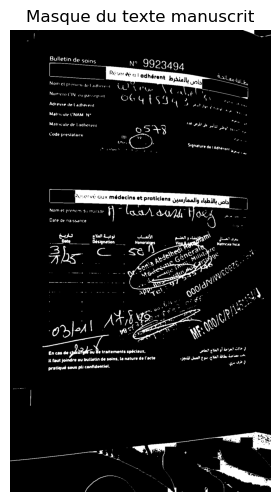

Using CPU. Note: This module is much faster with a GPU.


Texte détecté: Bulletin de soins (Précision: 0.77)
Texte détecté: N (Précision: 0.40)
Texte détecté: 9923494 (Précision: 1.00)
Texte détecté: ٧٤٠ (Précision: 0.23)
Texte détecté: t | odhdrent (Précision: 0.18)
Texte détecté: Not ؟t م»f١، ٢٩٠٦١ذ؛t١ ١`٨٩`٠٨١١٢ ١ ٠ (Précision: 0.00)
Texte détecté: ذاص (Précision: 0.29)
Texte détecté: L'` (Précision: 0.14)
Texte détecté: »٨ا'( (Précision: 0.10)
Texte détecté: N١'٧t t0 {`IN (Précision: 0.04)
Texte détecté: / ١tو (Précision: 0.04)
Texte détecté: |١ ١٧١''٠٦'١٠١ (Précision: 0.01)
Texte détecté: {١١؟٨،١١٨١ ( م٧١ (Précision: 0.02)
Texte détecté: ٢٥ ٥،٦١«، » (Précision: 0.13)
Texte détecté: ار-  (Précision: 0.17)
Texte détecté: ٧١١ ١ ٧٤١٢ (Précision: 0.22)
Texte détecté: N٨M N٢ (Précision: 0.34)
Texte détecté: ٧٢ ٧١٠٠ ،٠ ٧٠٥١٢ (Précision: 0.20)
Texte détecté: ,10|»١٧٨١| (Précision: 0.04)
Texte détecté: علد (Précision: 0.41)
Texte détecté: للمامر ٠ل المم (Précision: 0.19)
Texte détecté: ١٥١٥١٢٢؛٣٥ ٥٥٥ (Précision: 0.16)
Texte détecté: 5+8 (Précisio

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr

# Charger l'image en niveaux de gris
image_path = r"C:\Users\emnad\Downloads\dataPI\bulletin_de_soin\bulletin_de_soin10.jpeg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 1️⃣ Afficher l’image originale
plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray')
plt.title("Image Originale")
plt.axis("off")
plt.show()

# 2️⃣ Appliquer un flou pour réduire le bruit
image_blur = cv2.GaussianBlur(image, (5, 5), 0)

# 3️⃣ Binarisation Otsu (au lieu d’adaptative)
_, image_bin = cv2.threshold(image_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Vérification visuelle de la binarisation
plt.figure(figsize=(6,6))
plt.imshow(image_bin, cmap='gray')
plt.title("Image après Binarisation")
plt.axis("off")
plt.show()

# 4️⃣ Détection des tampons (fermeture morphologique)
kernel = np.ones((20, 20), np.uint8)  # On augmente la taille du kernel
image_morph = cv2.morphologyEx(image_bin, cv2.MORPH_CLOSE, kernel, iterations=2)

# Vérification de l'effet du filtrage morphologique
plt.figure(figsize=(6,6))
plt.imshow(image_morph, cmap='gray')
plt.title("Image après Détection des Tampons")
plt.axis("off")
plt.show()

# 5️⃣ Création d’un masque : Garder le texte manuscrit et supprimer les tampons
mask = cv2.absdiff(image_bin, image_morph)  # On garde la différence

# Vérification du masque
plt.figure(figsize=(6,6))
plt.imshow(mask, cmap='gray')
plt.title("Masque du texte manuscrit")
plt.axis("off")
plt.show()

# 6️⃣ OCR avec EasyOCR
reader = easyocr.Reader(['ar', 'en'], gpu=False)  # Ajoute 'ar' si nécessaire
results = reader.readtext(mask)

# Affichage des résultats
for (bbox, text, prob) in results:
    print(f"Texte détecté: {text} (Précision: {prob:.2f})")
